In [4]:
#communities (SIRD) for checking the spread of the virus and the amount of death it causes based on the activity of a community (older inactive, younger active group)
import numpy as np
################################## Used variables and initializations ##################################

L = 2    
w = [0.5, 0.5]   
A = [[6, 0.2],
     [0.2, 0.1]]

# time and steps
T = 10
dt = 0.001
nsteps = round(T/dt)
v_S_1 = [[0, 0] for t in range(nsteps+1)]
v_I_1 = [[0, 0] for t in range(nsteps+1)]
v_R_1 = [[0, 0] for t in range(nsteps+1)]
v_D_1 = [[0, 0] for t in range(nsteps+1)]
v_V_1 = [[0, 0] for t in range(nsteps+1)]
# initial condition
#Egymás alatti értékeknek 1-et kell adni
# Először a fiatalabb, aktívabb csoportot kezdjük el oltani, (tőlük indul a járvány is)
v_S_1[0] = [0.95, 1]
v_I_1[0] = [0.05, 0]

# model parameters
beta = 3     # fertőzési ráta, rate of getting infected by the virus
gamma = 1    # gyógyulási ráta, recovering rate
delta = 1    # oltási sebesség, vakcina mennyisége, speed of the vaccination, amount of the vaccine
epszilon = 1 # Milyen gyorsan alakul ki a védettség az oltástól, How fast can the population get immunity against the virus because of the vaccine.

mu = [0.000001, 0.01] # Halálozási ráta az egyes közösségekben, Death rate in the communities. A lower one for the younger generation, first population. 
                       # A higher one for the older, more harmful generation, second population.
# We starting to vaccinate the younger generation, which is less likely to die from the virus, but is more active
theta = [1, 0] # Now, we will vaccinate the first, younger community.
################################## Differenciálegyenletek implementálása ##################################

for t in range(nsteps):
    for l in range(L):
        if v_S_1[t][l] < 0.0000000001: # We are vaccinating the population until we have an amount of people to vaccinate, after that the process will 
                             # obviously stop.
             delta = 0
        v_S_1[t+1][l] = v_S_1[t][l] - dt*beta*v_S_1[t][l]*sum(A[k][l]*w[k]*v_I_1[t][k] for k in range(L)) - dt*delta*theta[l]*v_S_1[t][l]
        v_I_1[t+1][l] = v_I_1[t][l] + dt*beta*v_S_1[t][l]*sum(A[k][l]*w[k]*v_I_1[t][k] for k in range(L)) - gamma*v_I_1[t][l]*dt
        v_V_1[t+1][l] = v_V_1[t][l] + dt*delta*theta[l]*v_S_1[t][l] - dt*epszilon * v_V_1[t][l]
        v_R_1[t+1][l] = v_R_1[t][l] + (1 - mu[l])*gamma*v_I_1[t][l]*dt + dt*epszilon*v_V_1[t][l]
        v_D_1[t+1][l] = v_D_1[t][l] + mu[l]*v_I_1[t][l]*dt

Total amount of deaths in the older community ...
vaccinating the younger community 0.206 %

Total amount of infections in the older comminity: 
vaccinating the younger community  20.616037381877884  %

Maximum amount of infected people at the same time in the older community: 
vaccinating the older community:  7.050672744107664 %

Length of time when v_I(t)>t: 
older community's time when v_I_1(t)>t:  1.7829999999999144


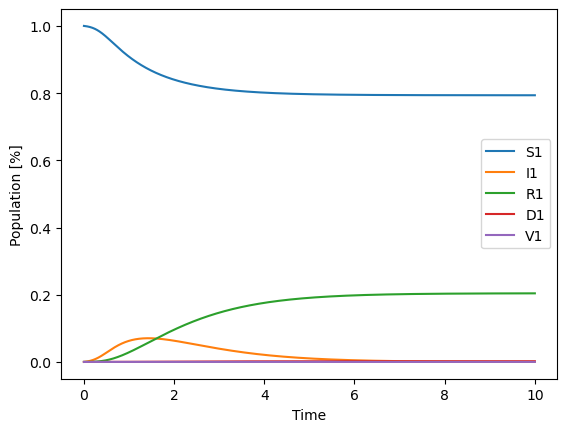

In [5]:
#Diagrams for communities with D
import matplotlib.pyplot as plt
# We generate data for the diagram about the older (second) community too
v_S_1_b = [v_S_1[t][1] for t in range(nsteps+1)]
v_I_1_b = [v_I_1[t][1] for t in range(nsteps+1)]
v_R_1_b = [v_R_1[t][1] for t in range(nsteps+1)]
v_D_1_b = [v_D_1[t][1] for t in range(nsteps+1)]
v_V_1_b = [v_V_1[t][1] for t in range(nsteps+1)]

v_S_1data = [0, 0]
v_I_1data = [0, 0]
v_R_1data = [0, 0]
v_D_1data = [0, 0]
v_V_1data = [0, 0]

for i in range(L):
    v_S_1data[i] = [v_S_1[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_I_1data[i] = [v_I_1[t][i] for t in range(nsteps+1)]
    
for i in range(L):
    v_R_1data[i] = [v_R_1[t][i] for t in range(nsteps+1)]
    
for i in range(L):
    v_D_1data[i] = [v_D_1[t][i] for t in range(nsteps+1)]
    
for i in range(L):
    v_V_1data[i] = [v_V_1[t][i] for t in range(nsteps+1)]

# Put on diagram how the flow of the pandemic goes in the older community when we vaccinate the younger community
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_1data[1],label='S1') 
plt.plot(trange,v_I_1data[1],label='I1') 
plt.plot(trange,v_R_1data[1],label='R1') 
plt.plot(trange,v_D_1data[1],label='D1') 
plt.plot(trange,v_V_1data[1],label='V1')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/13_SIR_D_active_communities_with_diff_social_activity_start_vaccinating_from_active.png', bbox_inches='tight') #Ábra mentése

#################################### Adatok kinyerése az egyes esetekből ######################
# Adatok kinyerése az egyes esetekből
print('Total amount of deaths in the older community ...')
print('vaccinating the younger community', format(v_D_1[nsteps][1]*100, '.3f'), '%')

#Összes fertőzőttek száma (v_I)
infected_1 = [0, 0]
for j in range(L):
    for i in range(nsteps):
        infected_1[j] += (v_I_1[i][j]*dt)
    
print('\nTotal amount of infections in the older comminity: ')
print("vaccinating the younger community ", infected_1[1]*100, " %")

#Maximális megbetegedések száma egyszerre
max_v_I_1 = [0, 0]
for j in range(L):
    for i in range(nsteps):
        if (v_I_1[i][j] > max_v_I_1[j]):
            max_v_I_1[j] = v_I_1[i][j]
    
print('\nMaximum amount of infected people at the same time in the older community: ')
print("vaccinating the older community: ", max_v_I_1[1]*100, "%")

# Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime_1 = [0.000, 0.000]
for j in range(L):
    for i in range(nsteps):
        if(v_I_1[i][j] > q):
            overloadedtime_1[j] += dt

print('\nLength of time when v_I(t)>t: ')
print("older community's time when v_I_1(t)>t: ", overloadedtime_1[1])


In [6]:
""" communities (SIRD) for checking the spread of the virus and the amount of death it causes
    based on the activity of a community (older inactive, younger active group)
"""
################################## Used variables and initializations ##################################
L = 2    
w = [0.5, 0.5]   
A = [[6, 0.2],
     [0.2, 0.1]]
# time and steps
T = 10
dt = 0.001
nsteps = round(T/dt)
v_S_2 = [[0, 0] for t in range(nsteps+1)]
v_I_2 = [[0, 0] for t in range(nsteps+1)]
v_R_2 = [[0, 0] for t in range(nsteps+1)]
v_D_2 = [[0, 0] for t in range(nsteps+1)]
v_V_2 = [[0, 0] for t in range(nsteps+1)]

"""initial condition,
   Egymás alatti értékeknek 1-et kell adni, a fiatalabb generációból indul a járvány
"""
v_S_2[0] = [0.95, 1]  
v_I_2[0] = [0.05, 0]

# model parameters
beta = 3     # fertőzési ráta, rate of getting infected by the virus
gamma = 1    # gyógyulási ráta, recovering rate
delta = 1    # oltási sebesség, vakcina mennyisége, speed of the vaccination, amount of the vaccine
epszilon = 1 # Milyen gyorsan alakul ki a védettség az oltástól, How fast can the population get immunity against the virus because of the vaccine.

mu = [0.000001, 0.01] # Halálozási ráta az egyes közösségekben, Death rate in the communities. A lower one for the younger generation, first population. 
                       # A higher one for the older, more harmful generation, second population.
theta = [0, 1] # we will use this to calculate when there were vaccination in one of the communities (1), and when there wasn't (0)

################################## Differenciálegyenletek implementálása ##################################
# SIRD for communities
# We starting to vaccinate the older generation, which is more likely to die from the virus, but is less active
for t in range(nsteps):
    for l in range(L): 
         if v_S_1[t][l] < 0.0000000001: # We are vaccinating the population until we have an amount of people to vaccinate, after that the process will 
                             # obviously stop.
             delta = 0
         v_S_2[t+1][l] = v_S_2[t][l] - dt*beta*v_S_2[t][l]*sum(A[k][l]*w[k]*v_I_2[t][k] for k in range(L)) - dt*delta*theta[l]*v_S_2[t][l]
         v_I_2[t+1][l] = v_I_2[t][l] + dt*beta*v_S_2[t][l]*sum(A[k][l]*w[k]*v_I_2[t][k] for k in range(L)) - gamma*v_I_2[t][l]*dt
         v_V_2[t+1][l] = v_V_2[t][l] + dt*delta*theta[l]*v_S_2[t][l] - dt*epszilon * v_V_2[t][l]
         v_R_2[t+1][l] = v_R_2[t][l] + (1 - mu[l])*gamma*v_I_2[t][l]*dt + dt*epszilon*v_V_2[t][l]
         v_D_2[t+1][l] = v_D_2[t][l] + mu[l]*v_I_2[t][l]*dt

Total amount of deaths in the older community ...
vaccinating the older community 0.099 %

Total amount of infections in the older comminity: 
vaccinating the older community  9.906601983255152  %

Maximum amount of infected people at the same time in the older community: 
older community's amount vaccinating the older community:  4.795736849621445 %

Length of time when v_I(t)>t: 
older community's time when v_I_2(t)>t:  0.0


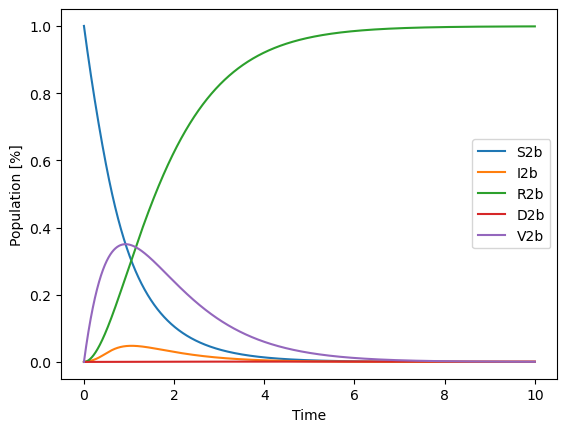

In [7]:
#Diagrams for communities with D, V
# We generate data for the diagram about the older (second) community
v_S_2_b = [v_S_2[t][1] for t in range(nsteps+1)]
v_I_2_b = [v_I_2[t][1] for t in range(nsteps+1)]
v_R_2_b = [v_R_2[t][1] for t in range(nsteps+1)]
v_D_2_b = [v_D_2[t][1] for t in range(nsteps+1)]
v_V_2_b = [v_V_2[t][1] for t in range(nsteps+1)]

v_S_2data = [0, 0]
v_I_2data = [0, 0]
v_R_2data = [0, 0]
v_D_2data = [0, 0]
v_V_2data = [0, 0]

for i in range(L):
    v_S_2data[i] = [v_S_2[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_I_2data[i] = [v_I_2[t][i] for t in range(nsteps+1)]
    
for i in range(L):
    v_R_2data[i] = [v_R_2[t][i] for t in range(nsteps+1)]
    
for i in range(L):
    v_D_2data[i] = [v_D_2[t][i] for t in range(nsteps+1)]
    
for i in range(L):
    v_V_2data[i] = [v_V_2[t][i] for t in range(nsteps+1)]


# Put on a diagram how the flow of the pandemic goes in the older community when we vaccinate the older community.
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_2data[1],label='S2b') 
plt.plot(trange,v_I_2data[1],label='I2b') 
plt.plot(trange,v_R_2data[1],label='R2b') 
plt.plot(trange,v_D_2data[1],label='D2b') 
plt.plot(trange,v_V_2data[1],label='V2b')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/13_SIR_D_inactive_communities_with_diff_social_activity_start_vaccinating_from_inactive.png', bbox_inches='tight') #Ábra mentése

################################## Adatok kinyerése az egyes esetekből ##################################
# Adatok kinyerése az egyes esetekből
print('Total amount of deaths in the older community ...')
print('vaccinating the older community', format(v_D_2[nsteps][1]*100, '.3f'), '%')

#Összes fertőzőttek száma (v_I)
infected_2 = [0, 0]
for j in range(L):
    for i in range(nsteps):
        infected_2[j] += (v_I_2[i][j]*dt)
    
print('\nTotal amount of infections in the older comminity: ')
print("vaccinating the older community ", infected_2[1]*100, " %")

# Maximális megbetegedések száma egyszerre
max_v_I_2 = [0, 0]
for j in range(L):
    for i in range(nsteps):
        if (v_I_2[i][j] > max_v_I_2[j]):
            max_v_I_2[j] = v_I_2[i][j]
    
print('\nMaximum amount of infected people at the same time in the older community: ')
print("older community's amount vaccinating the older community: ", max_v_I_2[1]*100, "%")


#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime_2 = [0.000, 0.000]
for j in range(L):
    for i in range(nsteps):
        if(v_I_2[i][j] > q):
            overloadedtime_2[j] += dt

print('\nLength of time when v_I(t)>t: ')
print("older community's time when v_I_2(t)>t: ", overloadedtime_2[1])
